# PROBLEM STATEMENT
The goal of the System Threat Forecaster is to predict the probability of a system getting infected by various families of malware, based on different properties of that system. The telemetry data containing these properties and the system infections was generated by threat reports collected by system's antivirus software. They contain the target that indicates whether the system is infected (1) or not infected(0). Early detection of malware infections can help prevent security breaches.

Aim:
To use the training data (train.csv) to build a machine learning model that can accurately predict the probability of malware infection for each machine in the test set (test.csv), learn attack patterns and help in early detection. The approach focuses on data preprocessing, feature engineering, and model optimization to achieve the highest predictive performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from IPython.display import Markdown
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
sample_data = pd.read_csv("sample_submission.csv")

In [3]:
train_data

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,a378b2196a7a1d8ee0d4f989ee46730e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1582.0,0,7.0,0,68585.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-21 00:59:00,2018-09-20,0
99996,7f4433ca05d24b9bbdd3932f8b05e61f,win8defender,1.1.15100.1,4.18.1806.18062,1.273.1156.0,0,7.0,0,11280.0,2.0,...,0,0.0,0,0,0.0,0.0,3.0,2018-08-10 07:23:00,2018-07-10,0
99997,d6852dfff534e03d5ddfd3c7875ab072,win8defender,1.1.15200.1,4.18.1807.18075,1.275.209.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,1.0,1.0,2018-08-26 23:51:00,2018-03-13,1
99998,70a8dc682128c9ff78a3de5aea9dac74,win8defender,1.1.14901.4,4.16.17656.18052,1.269.641.0,0,7.0,0,53447.0,1.0,...,1,0.0,1,1,1.0,0.0,1.0,2018-06-04 17:13:00,2018-05-08,0


In [4]:
test_data

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,...,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,...,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
2,692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,...,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
3,2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,...,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
4,256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,...,12126.0,0,0.0,0,0,0.0,0.0,7.0,2018-05-06 01:31:00,2018-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,42d3ddb25eeb149517e2b6871b061df4,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1329.0,0,7.0,0,32554.0,3.0,...,20107.0,0,0.0,0,0,0.0,0.0,13.0,2018-09-16 18:15:00,2018-09-11
9996,3d474c494d797cafc2ab1665711f0f91,win8defender,1.1.15100.1,4.11.15063.0,1.273.894.0,0,7.0,0,53447.0,1.0,...,11386.0,0,0.0,0,0,0.0,1.0,1.0,2018-08-05 22:50:00,2017-04-05
9997,9aee2fc73af8240a688ceb83d41c0418,win8defender,1.1.15200.1,4.18.1807.18075,1.275.504.0,0,7.0,0,47238.0,2.0,...,12247.0,1,0.0,0,0,0.0,0.0,11.0,2018-08-31 16:03:00,2018-06-12
9998,a2f8c1f88b78271c38767fe43850b359,win8defender,1.1.15200.1,4.18.1807.18075,1.275.461.0,0,7.0,0,53447.0,1.0,...,4269.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-30 18:35:00,2017-12-12


In [5]:
sample_data

,id,target
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
9995,9995,1
9996,9996,0
9997,9997,0
9998,9998,1


In [6]:
# Sets the maximum number of rows and columns displayed (prevents excessive truncation)
pd.set_option('display.max_rows', 80) 
pd.set_option('display.max_columns', 80)

In [7]:
train_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0

In [8]:
test_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,1.0,1,218,129455.0,224.0,16,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,249148.0,4.0,5.0,3026.0,953869.0,HDD,134182.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,1.0,5,FullAuto,0,INVALID_LICENSE,Retail,0.0,Retail,486.0,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,2.0,1,68,138510.0,276.0,74,windows8,x64,6.3.0.0,9600,768,windows8.1,9600.19067.amd64fre.winblue_ltsb_escrow.180619...,Home,1.0,0,0.0,333.0,1.0,1.0,Notebook,Windows.Desktop,585.0,189972.0,2.0,5.0,3403.0,715404.0,HDD,695042.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.14393.321,amd64,rs1_release,14393,321,Core,CORE,Update,7.0,30,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,556.0,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
2,692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,1.0,1,141,154469.0,167.0,227,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,0.0,117.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,953869.0,HDD,931858.0,0,4096.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.16299.431,amd64,rs3_release_svc_escrow,16299,431,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,10.0,35,Notify,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
3,2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,1.0,1,41,130775.0,240.0,217,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,0.0,117.0,1.0,1.0,Notebook,Windows.Desktop,2668.0,171094.0,4.0,1.0,77.0,953869.0,HDD,455936.0,0,16384.0,Notebook,13.9,1920.0,1080.0,Mobile,0.0,10.0.16299.431,amd64,rs3_release_svc_escrow,16299,431,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,9.0,34,Notify,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
4,256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,1.0,1,43,51125.0,53.0,42,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Notebook,Windows.Desktop,2668.0,35033.0,4.0,5.0,2289.0,715404.0,HDD,50001.0,0,4096.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.17134.112,amd64,rs4_release,17134,112,Professional,PROFESSIONAL,Upgrade,37.0,158

# EXPLORATORY DATA ANALYSIS

In [9]:
train_data.shape, test_data.shape

((100000, 76), (10000, 75))

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

# Identify missing values that may require imputation or removal.

In [11]:
display(Markdown("Null values in the Train data"))
missing_values = train_data.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

Null values in the Train data

SMode                                 981
CityID                                623
IsGamer                               559
RegionIdentifier                      559
InternalBatteryNumberOfCharges        515
FirmwareManufacturerID                376
FirmwareVersionID                     334
IsFlightsDisabled                     326
OEMModelID                            228
OEMNameID                             212
FirewallEnabled                       166
TotalPhysicalRAMMB                    151
IsAlwaysOnAlwaysConnectedCapable      134
OSInstallLanguageID                   113
SystemVolumeCapacityMB                110
PrimaryDiskCapacityMB                 110
IEVersionID                           107
ProcessorManufacturerID                85
ProcessorCoreCount                     85
ProcessorModelID                       85
IsSystemProtected                      76
NumAntivirusProductsInstalled          76
AntivirusConfigID                      76
NumAntivirusProductsEnabled       

In [12]:
# Calculate and sort the percentage of missing values per feature in descending order
missing_percentage = (train_data.isnull().sum() / len(train_data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage)

SMode                                 0.981
CityID                                0.623
RegionIdentifier                      0.559
IsGamer                               0.559
InternalBatteryNumberOfCharges        0.515
FirmwareManufacturerID                0.376
FirmwareVersionID                     0.334
IsFlightsDisabled                     0.326
OEMModelID                            0.228
OEMNameID                             0.212
FirewallEnabled                       0.166
TotalPhysicalRAMMB                    0.151
IsAlwaysOnAlwaysConnectedCapable      0.134
OSInstallLanguageID                   0.113
SystemVolumeCapacityMB                0.110
PrimaryDiskCapacityMB                 0.110
IEVersionID                           0.107
ProcessorManufacturerID               0.085
ProcessorCoreCount                    0.085
ProcessorModelID                      0.085
NumAntivirusProductsEnabled           0.076
AntivirusConfigID                     0.076
NumAntivirusProductsInstalled   

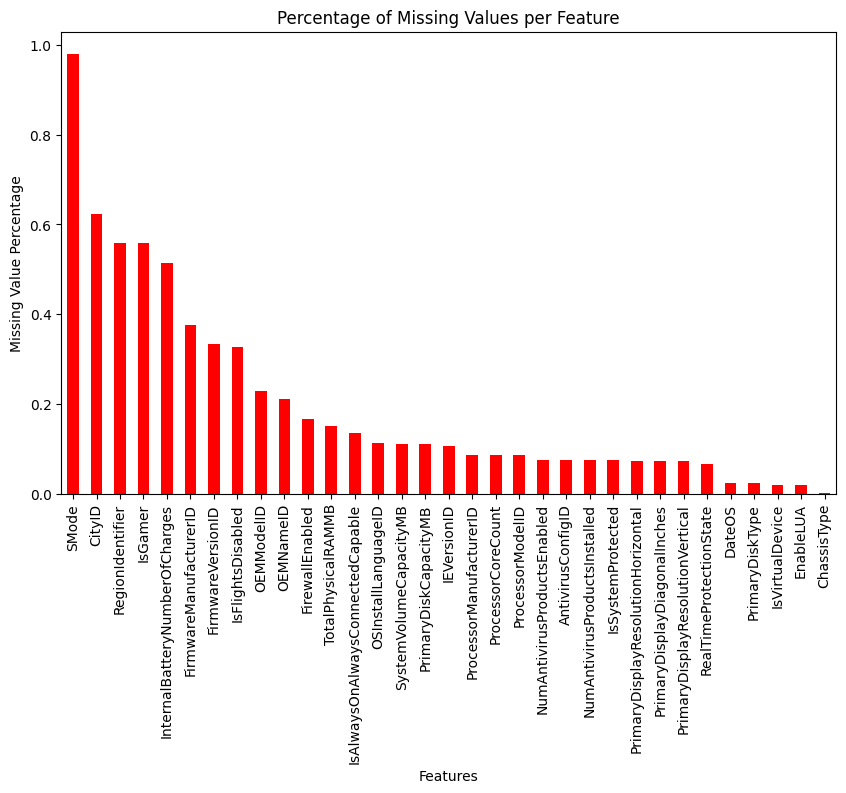

In [13]:
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='red')
plt.title('Percentage of Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Missing Value Percentage')
plt.show()

# Since the feature with the highest missing value percentage has only 0.98% null values,they need not be dropped as they are insignificant.

In [14]:
display(Markdown("Null values in the Test data"))
display(test_data[test_data.columns[test_data.isnull().any()]].isnull().sum())

Null values in the Test data

RealTimeProtectionState                9
AntivirusConfigID                      2
NumAntivirusProductsInstalled          2
NumAntivirusProductsEnabled            2
CityID                                61
GeoRegionID                            1
IsSystemProtected                      2
SMode                                 92
IEVersionID                           10
FirewallEnabled                       16
OEMNameID                             18
OEMModelID                            21
ProcessorCoreCount                    11
ProcessorManufacturerID               11
ProcessorModelID                      11
PrimaryDiskCapacityMB                 10
PrimaryDiskType                        4
SystemVolumeCapacityMB                10
TotalPhysicalRAMMB                    12
PrimaryDisplayDiagonalInches           6
PrimaryDisplayResolutionHorizontal     6
PrimaryDisplayResolutionVertical       6
InternalBatteryNumberOfCharges        54
OSInstallLanguageID                   14
IsFlightsDisable

In [15]:
test_null_columns = set(test_data.columns[test_data.isnull().any()])
train_null_columns = set(train_data.columns[train_data.isnull().any()])

common_missing_columns = test_null_columns & train_null_columns

test_only_missing_columns = test_null_columns - train_null_columns
train_only_missing_columns = train_null_columns - test_null_columns

print("Columns with missing values in BOTH train and test data:")
print(common_missing_columns)

print("\nColumns with missing values ONLY in test data:")
print(test_only_missing_columns)

print("\nColumns with missing values ONLY in train data:")
print(train_only_missing_columns)

Columns with missing values in BOTH train and test data:
{'SystemVolumeCapacityMB', 'NumAntivirusProductsInstalled', 'CityID', 'OEMNameID', 'DateOS', 'FirmwareVersionID', 'IsGamer', 'PrimaryDiskCapacityMB', 'OEMModelID', 'RegionIdentifier', 'FirewallEnabled', 'ProcessorCoreCount', 'RealTimeProtectionState', 'ProcessorModelID', 'ProcessorManufacturerID', 'TotalPhysicalRAMMB', 'SMode', 'IsSystemProtected', 'FirmwareManufacturerID', 'IEVersionID', 'InternalBatteryNumberOfCharges', 'PrimaryDisplayDiagonalInches', 'IsAlwaysOnAlwaysConnectedCapable', 'IsFlightsDisabled', 'PrimaryDiskType', 'IsVirtualDevice', 'OSInstallLanguageID', 'NumAntivirusProductsEnabled', 'PrimaryDisplayResolutionVertical', 'AntivirusConfigID', 'PrimaryDisplayResolutionHorizontal'}

Columns with missing values ONLY in test data:
{'GeoRegionID'}

Columns with missing values ONLY in train data:
{'ChassisType', 'EnableLUA'}


# Unique values in each column

In [16]:
train_data.nunique().sort_values(ascending=False)

MachineID                             99835
SystemVolumeCapacityMB                46188
CityID                                16047
OEMModelID                            15952
FirmwareVersionID                     12299
SignatureVersion                       2735
DateAS                                 2695
AntivirusConfigID                      1976
InternalBatteryNumberOfCharges         1760
ProcessorModelID                       1659
OEMNameID                               837
PrimaryDiskCapacityMB                   398
PrimaryDisplayDiagonalInches            362
OSBuildLab                              281
GeoRegionID                             239
NumericOSVersion                        221
CountryID                               220
OSBuildRevisionOnly                     199
LocaleEnglishNameID                     185
FirmwareManufacturerID                  169
PrimaryDisplayResolutionVertical        131
TotalPhysicalRAMMB                      127
PrimaryDisplayResolutionHorizont

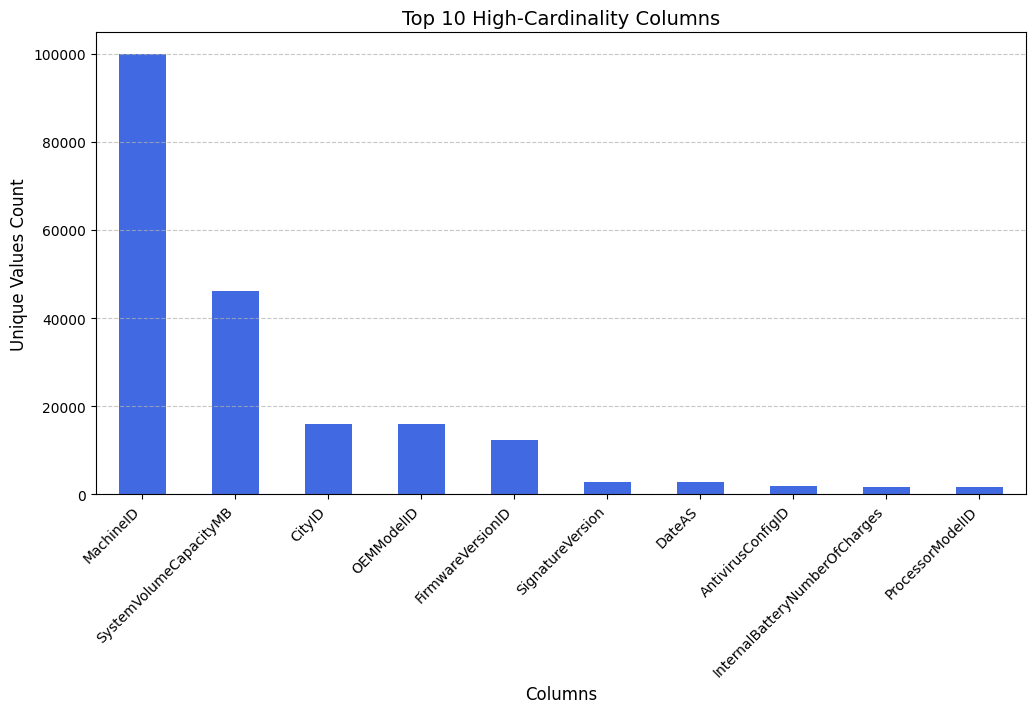

In [17]:
top_10_cardinal_columns = train_data.nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_cardinal_columns.plot(kind='bar', color='royalblue')

# Customize plot
plt.title("Top 10 High-Cardinality Columns", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Unique Values Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# It is observed that MachineID has very high cardinality, almost equal to the total number of rows in the dataset. Therefore it can be considered a unique identifier for the dataset, and it is better to remove it from the dataset before training.,

In [18]:
low_variance_cols = [col for col in train_data.columns if train_data[col].nunique() <= 1]
high_variance_cols = [col for col in train_data.columns if train_data[col].nunique() >= 12000]
print(f"Low-variance features: {low_variance_cols}")
print(f"High-variance features: {high_variance_cols}")

Low-variance features: ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']
High-variance features: ['MachineID', 'CityID', 'OEMModelID', 'SystemVolumeCapacityMB', 'FirmwareVersionID']


In [19]:
train_data[low_variance_cols].head()

,IsBetaUser,AutoSampleSubmissionEnabled,IsFlightsDisabled
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


# Since these features contain only a single unique value, they are irrlevant for detecting malware in the system and should be dropped

# Numerical and Categorical features

In [20]:
display(Markdown("*Numerical Features*"))
display(train_data.describe())
display(Markdown("*Categorical Features*"))
display(train_data.describe(include=['object']))

*Numerical Features*

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,100000.000000,100000.000000,100000.000000,99924.000000,100000.0,99019.000000,99893.000000,99834.000000,99981.000000,99788.000000,99772.000000,99915.000000,99915.000000,99915.000000,9.989000e+04,9.989000e+04,100000.00000,99849.000000,99928.000000,99928.000000,99928.000000,9.948500e+04,100000.000000,100000.000000,99887.000000,100000.000000,100000.000000,99674.0,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,122.695100,15917.208720,578.403380,0.955326,0.0,0.000505,124.053848,0.980067,0.996569,2209.573265,238780.914154,4.011500,4.530711,2367.693069,5.158619e+05,3.819905e+05,0.08140,6132.087442,16.708674,1552.230416,898.253192,1.118069e+09,15990.596350,986.531360,14.519267,60.030870,0.000520,0.0,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,69.242252,1943.421132,247.240971,0.206588,0.0,0.022466,33.535395,0.139771,0.266669,1300.863891,71708.483379,2.033075,1.288050,837.822392,3.525624e+05,3.246240e+05,0.27345,4813.882548,6.031598,363.438980,213.695880,1.884682e+09,1810.756601,2971.429862,10.142233,44.715508,0.022798,0.0,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,7601.000000,16.000000,0.000000,0.0,0.000000,39.000000,0.000000,0.000000,46.000000,22.000000,1.000000,1.000000,3.000000,1.228800e+04,1.088000e+04,0.00000,512.000000,5.300000,400.000000,300.000000,0.000000e+00,10240.000000,0.000000,1.000000,5.000000,0.000000,0.0,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,74.000000,16299.000000,256.000000,1.000000,0.0,0.000000,111.000000,1.000000,1.000000,1443.000000,189586.000000,2.000000,5.000000,1998.000000,2.441980e+05,1.208410e+05,0.00000,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00,16299.000000,167.000000,8.000000,31.000000,0.000000,0.0,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,88.000000,16299.000000,768.000000,1.000000,0.0,0.000000,135.000000,1.000000,1.000000,2102.000000,246528.000000,4.000000,5.000000,2503.000000,4.769400e+05,2.567655e+05,0.00000,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00,16299.000000,285.000000,9.000000,34.000000,0.000000,0.0,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,182

*Categorical Features*

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,OSBuildLab,SKUEditionName,MDC2FormFactor,DeviceFamily,PrimaryDiskType,ChassisType,PowerPlatformRole,NumericOSVersion,OSArchitecture,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,DateAS,DateOS
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,99977,99998,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,99976
unique,99835,2,37,69,2735,4,3,7,9,281,8,11,2,4,28,9,221,3,13,20,18,9,6,4,6,7,2695,112
top,d45940eafb98ddb67cd89eefb5dac822,win8defender,1.1.15200.1,4.18.1807.18075,1.273.1420.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,Notebook,Windows.Desktop,HDD,Notebook,Mobile,10.0.17134.228,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail,2018-08-15 06:29:00,2018-08-14
freq,2,99771,45219,62119,1274,98344,91262,98368,45837,42964,62863,64547,99971,66202,59459,69874,17069,91281,46909,39275,39273,32033,45154,89860,52195,94153,1274,20905


# Target variable

*The dataset distribution is balanced with respect to the target variable*

target
1    50525
0    49475
Name: count, dtype: int64


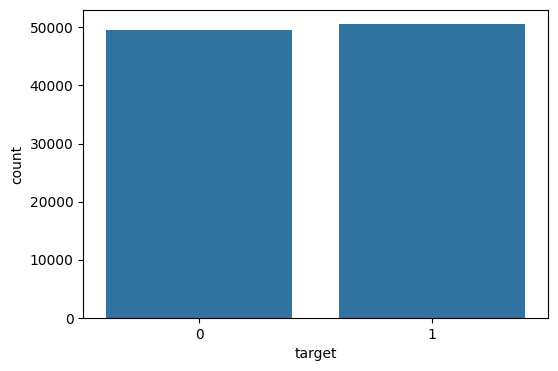

In [21]:
display(Markdown("*The dataset distribution is balanced with respect to the target variable*"))
print(train_data['target'].value_counts())
plt.figure(figsize=(6,4))
rating_value = train_data['target'].value_counts()
sns.countplot(x='target', data=train_data)
plt.show()

# Balanced Dataset:

Malware detected (1): 50.52%
Malware not detected (0): 49.47%
 # The dataset is fairly balanced, so we don’t need oversampling or weighting adjustments.

In [22]:
numerical_features = train_data.select_dtypes(include = ['int64','float64'])
categorical_features = train_data.select_dtypes(include = ['object'])
print(f"The data contains {len(categorical_features.columns.tolist())} categorical features and {len(numerical_features.columns.tolist())} numerical features.")
display(Markdown("*Numerical Features*"))
display(numerical_features.head())
display(Markdown("*Categorical Features*"))
display(categorical_features.head())

The data contains 28 categorical features and 48 numerical features.


*Numerical Features*

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,14393,768,1.0,0,0.0,98.0,1.0,1.0,561.0,330367.0,4.0,5.0,1850.0,15028.0,14348.0,0,1024.0,8.0,800.0,1280.0,1.420000e+02,14393,2214,5.0,26,0,0.0,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,0
1,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,17134,256,1.0,0,0.0,137.0,1.0,1.0,2668.0,25212.0,4.0,5.0,2407.0,953869.0,952592.0,1,4096.0,19.4,1600.0,900.0,4.294967e+09,17134,228,9.0,34,0,0.0,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,1
2,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,17134,768,1.0,0,0.0,137.0,1.0,1.0,3035.0,263666.0,4.0,5.0,2719.0,228936.0,228321.0,1,8192.0,24.0,1920.0,1080.0,4.294967e+09,17134,285,5.0,26,0,0.0,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,1
3,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,15063,768,1.0,0,0.0,108.0,1.0,1.0,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,1890776.0,0,8192.0,15.5,1366.0,768.0,0.000000e+00,15063,850,7.0,30,0,0.0,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,1
4,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,17134,256,1.0,0,0.0,137.0,1.0,1.0,2668.0,257309.0,2.0,5.0,4322.0,305245.0,52804.0,0,2048.0,20.0,1600.0,900.0,4.294967e+09,17134,285,37.0,158,0,0.0,628.0,13224.0,0,0.0,0,0,0.0,1.0,7.0,0


*Categorical Features*

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,OSBuildLab,SKUEditionName,MDC2FormFactor,DeviceFamily,PrimaryDiskType,ChassisType,PowerPlatformRole,NumericOSVersion,OSArchitecture,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,DateAS,DateOS
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,windows10,x86,10.0.0.0,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,SmallTablet,Windows.Desktop,SSD,Notebook,Slate,10.0.14393.2214,x86,rs1_release,Core,CORE,Update,UNKNOWN,IS_GENUINE,Retail,Retail,2018-09-10 10:11:00,2018-04-17
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,AllInOne,Windows.Desktop,HDD,AllinOne,Desktop,10.0.17134.228,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:DM,Retail,2018-08-16 00:01:00,2018-08-14
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,Desktop,Windows.Desktop,SSD,Desktop,Desktop,10.0.17134.285,amd64,rs4_release,Core,CORE,Reset,FullAuto,IS_GENUINE,OEM:NONSLP,Retail,2018-09-20 23:20:00,2018-09-11
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,windows10,x64,10.0.0.0,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,Notebook,Windows.Desktop,HDD,Notebook,Mobile,10.0.15063.850,amd64,rs2_release,Core,CORE,Upgrade,UNKNOWN,IS_GENUINE,OEM:DM,Retail,2018-09-14 00:32:00,2018-01-03
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,windows10,x86,10.0.0.0,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,Desktop,Windows.Desktop,HDD,Desktop,Desktop,10.0.17134.285,x86,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail,2018-09-15 19:34:00,2018-09-11


# outliers

In [23]:
# Extract numerical columns (excluding target)
num_cols = train_data.select_dtypes(include=['number']).drop(columns=['target']).columns

# Compute the first (Q1) and third quartile (Q3)
q1_vals = train_data[num_cols].quantile(0.25)
q3_vals = train_data[num_cols].quantile(0.75)

# Compute IQR (Interquartile Range)
iqr_vals = q3_vals - q1_vals

# Identify outliers beyond 1.5 * IQR range
outliers= (train_data[num_cols] < (q1_vals - 1.5 * iqr_vals)) | (train_data[num_cols] > (q3_vals + 1.5 * iqr_vals))

# Compute total number of outliers and then its percentage
total_outliers = outliers.sum().sum()
total_data_points = train_data[num_cols].size  # Total numerical values
overall_outlier_pct = (total_outliers / total_data_points) * 100   # Compute overall outlier percentage

# Compute per-column outlier percentage
feature_outlier_counts = outliers.sum()
feature_outlier_pct = (feature_outlier_counts / len(train_data)) * 100

# Rank features by outlier percentage (descending)
sorted_outlier_features = feature_outlier_pct.sort_values(ascending=False)

print(f"Total Outlier Percentage: {overall_outlier_pct:.2f}%\n")
print("Feature-wise Outlier Percentage (Descending):\n")
print(sorted_outlier_features)

Total Outlier Percentage: 3.92%

Feature-wise Outlier Percentage (Descending):

AntivirusConfigID                     19.581
OSBuildNumber                         15.982
OSBuildNumberOnly                     15.449
OSBuildRevisionOnly                   14.258
IsTouchEnabled                        12.847
ProcessorManufacturerID               11.735
ProcessorCoreCount                    11.142
ProcessorModelID                      10.931
PrimaryDisplayDiagonalInches          10.749
OEMNameID                             10.270
HasOpticalDiskDrive                    8.140
TotalPhysicalRAMMB                     7.094
IsAlwaysOnAlwaysConnectedCapable       5.832
IEVersionID                            4.949
IsSystemProtected                      4.464
IsPenCapable                           4.058
RealTimeProtectionState                2.559
NumAntivirusProductsEnabled            2.259
OSInstallLanguageID                    2.256
FirewallEnabled                        1.990
PrimaryDisplayResolu

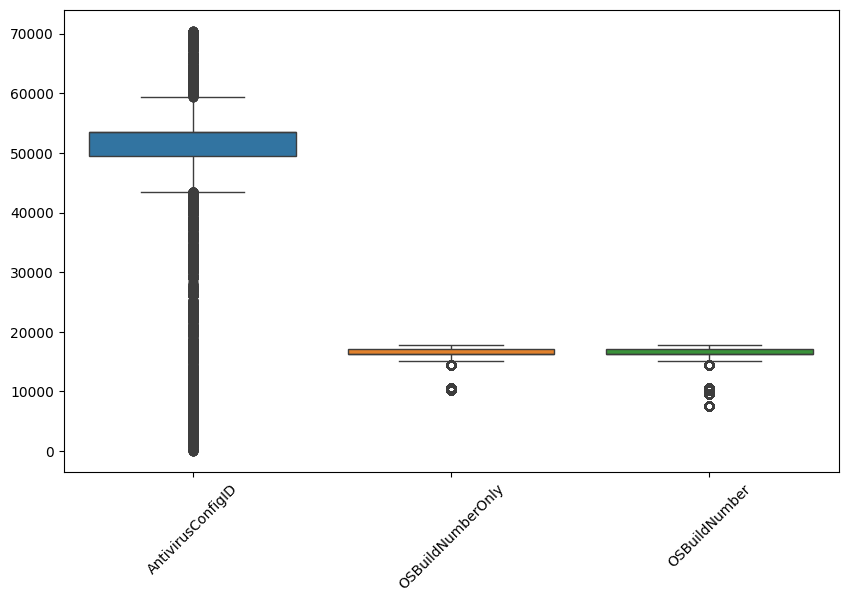

In [24]:
plt.figure(figsize=(10, 6))  
sns.boxplot(data=train_data[['AntivirusConfigID','OSBuildNumberOnly','OSBuildNumber']])  
plt.xticks(rotation=45)  
plt.show()

. Since AntivirusConfigID behaves like an ID and has many outliers, it can be considered for dropping if it has very low correlation with the target
. Outlier capping is not being performed because non sensitive tree-based models like XGBoost, LightGBM, and RandomForest are robust to outliers, as data is split based on thresholds rather than being influenced by extreme values.
. Additionally, valuable information that these models can leverage for better decision boundaries may be lost if outliers are removed.

# Correlation Analysis for Numerical Features with the target

To identify numerical features that strongly correlate with the target (malware infection).

Strongly correlated features are good predictors for the model.
The heatmap visualizes relationships of different features with the target

In [25]:
# Compute correlation with the target variable
correlation_with_target = numerical_features .corr()["target"].abs().sort_values(ascending=False)
print(correlation_with_target.head(20))

target                                1.000000
NumAntivirusProductsInstalled         0.151375
AntivirusConfigID                     0.118304
TotalPhysicalRAMMB                    0.065747
IsAlwaysOnAlwaysConnectedCapable      0.064776
IsSystemProtected                     0.062401
IsGamer                               0.061191
ProcessorCoreCount                    0.056769
PrimaryDiskCapacityMB                 0.049117
RealTimeProtectionState               0.049012
IsTouchEnabled                        0.046142
IsPassiveModeEnabled                  0.041997
NumAntivirusProductsEnabled           0.041547
IsVirtualDevice                       0.039789
OSBuildNumberOnly                     0.038544
PrimaryDisplayDiagonalInches          0.035064
OSBuildNumber                         0.034712
PrimaryDisplayResolutionHorizontal    0.030559
IEVersionID                           0.023820
HasOpticalDiskDrive                   0.022328
Name: target, dtype: float64


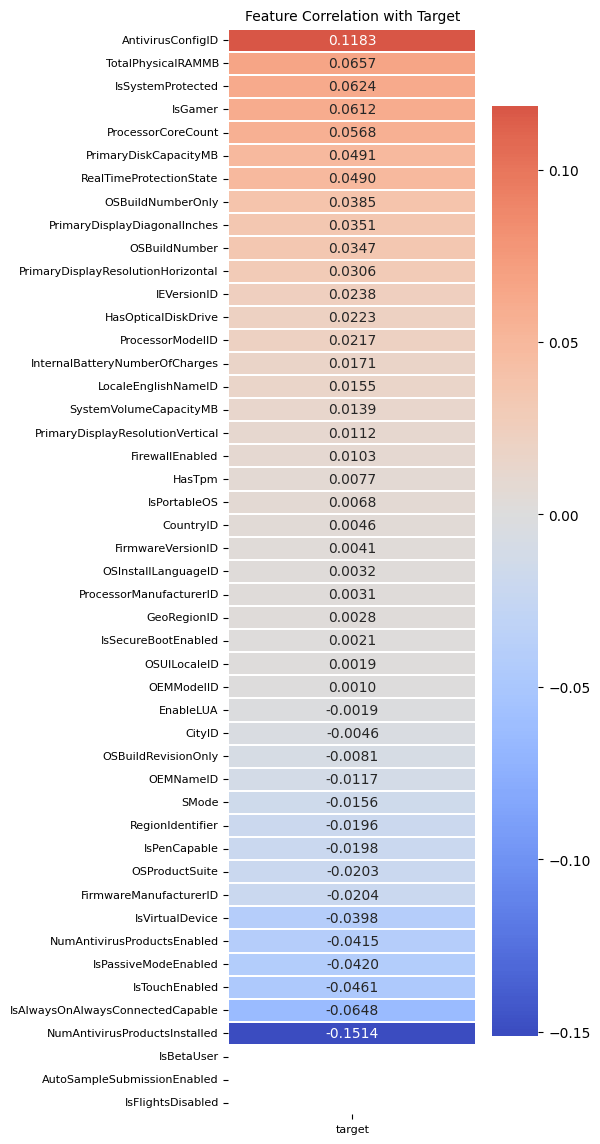

In [26]:
# Compute correlation of all numerical features with target
target_corr = numerical_features.corr()["target"].drop("target")  # drop target -self-correlation
# Convert to DataFrame for seaborn heatmap (change series to dataframe)
target_corr_df = target_corr.to_frame().sort_values(by="target", ascending=False)
plt.figure(figsize=(4, len(target_corr_df) * 0.3))  

sns.heatmap(target_corr_df, cmap="coolwarm", annot=True, fmt=".4f", center=0, linewidths=0.3)

plt.title("Feature Correlation with Target", fontsize=10)
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)

plt.show()

# Observations from Correlation Analysis with the target:
Weak Overall Correlation: No feature has a strong correlation with the target, indicating that malware infection is influenced by multiple factors rather than a single dominant one.

Security-Related Features:

NumAntivirusProductsInstalled (-0.15) and AntivirusConfigID (0.12) show the highest correlations, suggesting that antivirus configurations and the number of installed antivirus programs may impact malware susceptibility.
IsSystemProtected (0.06) and RealTimeProtectionState (0.05) indicate that having security protections enabled does not fully eliminate malware risks.
Hardware Influence:

TotalPhysicalRAMMB (0.07) and ProcessorCoreCount (0.06) suggest that system specifications might have a minor effect on malware exposure, possibly due to performance-related security updates or software behavior.
PrimaryDiskCapacityMB (0.05) and PrimaryDisplayDiagonalInches (0.04) hint at a slight association between system hardware and infection probability.
OS and System Features:

OS-related variables (OSBuildNumber, OSBuildNumberOnly, IEVersionID) have weak correlations, implying that OS versions alone do not significantly determine infection risk.
FirewallEnabled (0.01) has a negligible impact, suggesting that having a firewall alone does not strongly affect malware vulnerability.
User Behavior and Device Type:

IsGamer (0.06) shows a moderate correlation, indicating that gaming systems may have higher malware exposure, potentially due to riskier software installations.
Features like IsTouchEnabled (-0.05) and IsAlwaysOnAlwaysConnectedCapable (-0.06) suggest a minor influence of device type on infection likelihood.

# Conclusion:
Malware infections are likely driven by a mix of system configurations, security settings, and user behavior rather than a single defining factor. A more advanced feature selection or interaction analysis may improve predictive performance.

 # Highly skewed features

Highly Skewed Features with Skewness Values and Correlation with Target:
Feature                       Skewness       Correlation with Target
EnableLUA                     164.0660       -0.0019
SMode                         44.4684        -0.0156
IsPortableOS                  43.8193        0.0068
HasTpm                        17.5377        0.0077
IsVirtualDevice               16.0429        -0.0398
TotalPhysicalRAMMB            7.9191         0.0657
IsPassiveModeEnabled          7.3330         -0.0420
FirewallEnabled               6.8695         0.0103
RealTimeProtectionState       6.5296         0.0490
NumAntivirusProductsEnabled   5.5489         -0.0415
PrimaryDisplayDiagonalInches  5.3478         0.0351
OSBuildRevisionOnly           5.1812         -0.0081
IsPenCapable                  4.6568         -0.0198
IsSystemProtected             4.4081         0.0624
IsAlwaysOnAlwaysConnectedCapable3.7665         -0.0648
ProcessorCoreCount            3.4375         0.0568
IEVersionID     

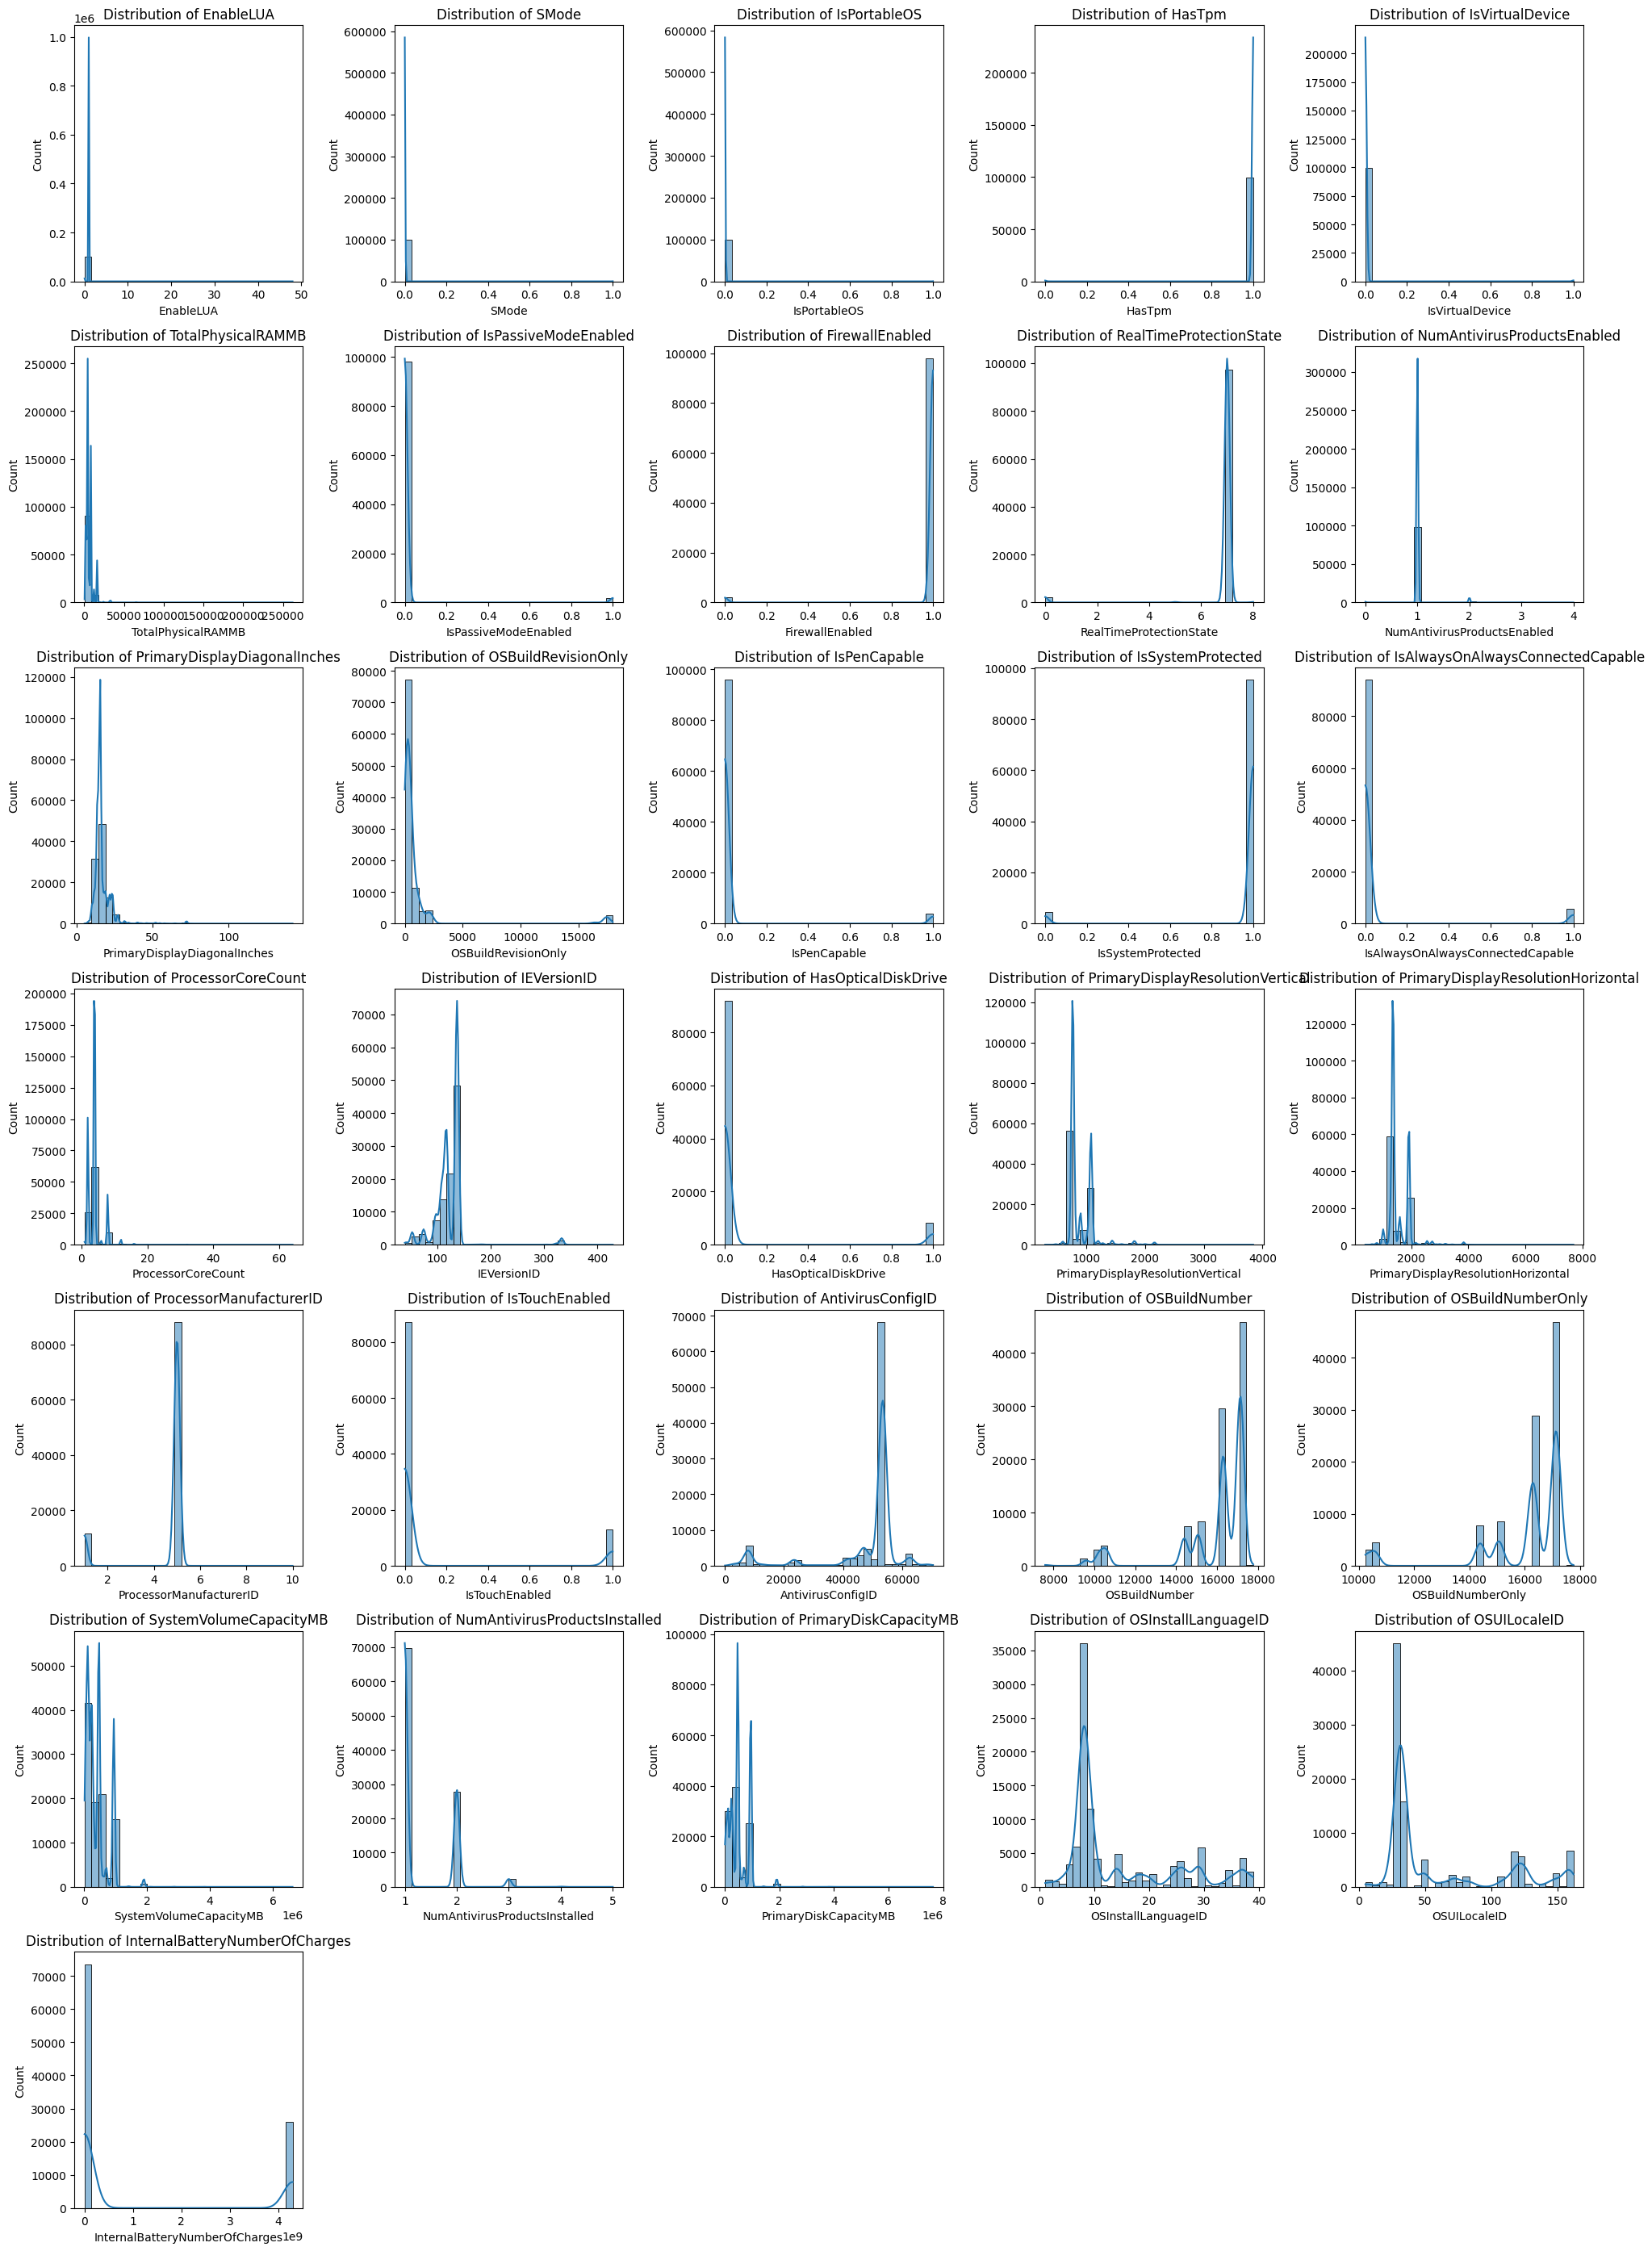

In [28]:
skewness = numerical_features.skew().abs().sort_values(ascending=False)

highly_skewed_features = skewness[skewness > 1].index.tolist()

correlations = train_data[highly_skewed_features + ['target']].corr()['target'].drop('target')

print("Highly Skewed Features with Skewness Values and Correlation with Target:")
print(f"{'Feature':<30}{'Skewness':<15}{'Correlation with Target'}")
print("=" * 65)
for col in highly_skewed_features:
    print(f"{col:<30}{skewness[col]:<15.4f}{correlations[col]:.4f}")


plots_per_row = 5
num_features = len(highly_skewed_features)
num_rows = (num_features // plots_per_row) + (num_features % plots_per_row > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(plots_per_row * 4, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(highly_skewed_features):
    sns.histplot(numerical_features[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# FEATURE ENGINEERING

In [29]:
# ADD LOG TRANSFORMATION
log_transform_features = [
    "NumAntivirusProductsInstalled", "NumAntivirusProductsEnabled", 
    "ProcessorCoreCount", "PrimaryDiskCapacityMB", "SystemVolumeCapacityMB", 
    "TotalPhysicalRAMMB", "PrimaryDisplayDiagonalInches", 
    "PrimaryDisplayResolutionHorizontal", "PrimaryDisplayResolutionVertical", 
    "InternalBatteryNumberOfCharges", "OSBuildRevisionOnly"
]
import numpy as np
train_data[log_transform_features] = np.log1p(train_data[log_transform_features])
test_data[log_transform_features] = np.log1p(test_data[log_transform_features])
print("log transformation done")

log transformation done


In [30]:
final_drop_features=['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled','MachineID']
train_data.drop(columns=final_drop_features, inplace=True)
test_data.drop(columns=final_drop_features, inplace=True)
print(len(final_drop_features),final_drop_features)

4 ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'MachineID']


# DATA PREPROCESSING

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Separate numerical and categorical columns COMMENT THIS IF LOG TRANS SHUD BE DONE AFTER NUMCOLS
numerical_cols = train_data.select_dtypes(include=[np.number]).drop(columns=['target']).columns.tolist()
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

# Define features and target
X = train_data.drop(columns=['target'])
y = train_data['target']

In [32]:
#DATA PREPROCESSING
# Create the transformer for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[  
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[  
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]), categorical_cols)
    ]
)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# preprocessor.fit(X_train, y_train)
X_train_scaled = preprocessor.fit_transform(X_train)
X_val_scaled = preprocessor.transform(X_val)
test_scaled = preprocessor.transform(test_data)  
print('preprocessing done')

preprocessing done


In [33]:
X_train.shape,X_train_scaled.shape

((90000, 71), (90000, 71))

# MODEL BUILDING
Model: XGBoost Classifier
Optimized for speed and accuracy, handles missing values, and prevents overfitting with regularization.

In [34]:
pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 6.1 MB/s eta 0:00:25
   ---------------------------------------- 1.8/150.0 MB 4.8 MB/s eta 0:00:32
    --------------------------------------- 2.6/150.0 MB 4.4 MB/s eta 0:00:34
    --------------------------------------- 3.4/150.0 MB 4.3 MB/s eta 0:00:35
   - -------------------------------------- 4.2/150.0 MB 4.2 MB/s eta 0:00:35
   - -------------------------------------- 5.0/150.0 MB 4.1 MB/s eta 0:00:36
   - -------------------------------------- 6.0/150.0 MB 4.1 MB/s eta 0:00:36
   - -------------------------------------- 6.6/150.0 MB 3.9 MB/s eta 0:00:38
   -- ------------------------------------- 7.6/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 8.1/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 9.2/150.0 MB 4.0 MB/s eta 0:00:36
 


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [39]:
# fixed random state for reproducibility, prevents warnings related to label encoding, 'logloss' for binary classification
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

model.fit(X_train_scaled, y_train)

y_val_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print("\nXGBoost Classifier Accuracy:", accuracy)
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", cm)
print("\nXGBoost Classification Report:\n", classification_report(y_val, y_val_pred))


XGBoost Classifier Accuracy: 0.627
Confusion Matrix:
 [[2919 2029]
 [1701 3351]]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.59      0.61      4948
           1       0.62      0.66      0.64      5052

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from xgboost import XGBClassifier 
# Initialize XGBoost model
model = XGBClassifier(
    random_state=42, 
    use_label_encoder=False , eval_metric='logloss' 
)


# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 300, 500],  # Number of trees in the ensemble
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 6, 10],  # Maximum tree depth
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weights needed in a child node
    'subsample': [0.7, 0.8, 1.0],  # Fraction of training samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # Fraction of features used per tree
}

# Initialize RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=20,  # Number of different combinations to try
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,  #Basic logs, shows progress
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    error_score='raise'  # Raise an error if a setting fails
)

# Perform the randomized search on the original scaled training dataset
random_search.fit(X_train_scaled, y_train)  

# Retrieve the best model found by RandomizedSearchCV
best_model = random_search.best_estimator_

# Evaluate Best Model
y_val_pred = best_model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print("\nBest XGBoost Classifier Accuracy:", accuracy) 
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# # Training Accuracy
y_train_pred = best_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Validation Accuracy
y_val_pred = best_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


# Make test predictions
y_test_pred = best_model.predict(test_scaled)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best XGBoost Classifier Accuracy: 0.637
Confusion Matrix:
 [[2970 1978]
 [1652 3400]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62      4948
           1       0.63      0.67      0.65      5052

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000

Training Accuracy: 0.7029
Validation Accuracy: 0.6370


In [42]:
# Prepare submission file
sample_data['target'] = y_test_pred
sample_data.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'
